In [1]:
import numpy as np
import sys
sys.path.append('../src/')
from transformations import KernelTransform, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = np.load("../data/eb_subset_all.npz")

In [3]:
Xo = data['dist'].flatten().reshape(-1,1)
X = Xo
# ss = StandardScaler()
# X = ss.fit_transform(Xo)
# ms = MinMaxScaler()
# X = ms.fit_transform(Xo)

In [4]:
ktg = KernelTransform('gaussian', use_std=True, sigma=8)
Xg = ktg.fit_transform(X)
kta = KernelTransform('alpha_decaying', use_std=True, epsilon=10, alpha=10)
Xa = kta.fit_transform(X)

In [5]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# axs[0].hist(Xo.flatten(), bins=100)
# axs[0].set_title('Original Data')

# axs[1].hist(Xg.flatten(), bins=100)
# axs[1].set_title('Gaussian Kernel')

# axs[2].hist(Xa.flatten(), bins=100)
# axs[2].set_title('Alpha-Decaying Kernel')

# plt.tight_layout()
# plt.show()


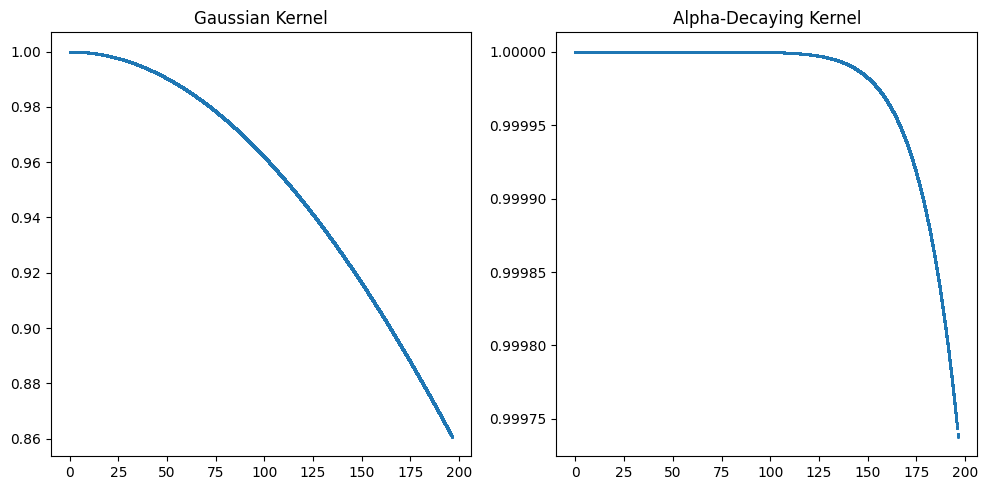

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(Xo.flatten(), Xg.flatten(), s=1)
axs[0].set_title('Gaussian Kernel')

axs[1].scatter(Xo.flatten(), Xa.flatten(), s=1)
axs[1].set_title('Alpha-Decaying Kernel')

plt.tight_layout()
plt.show()


In [7]:
Xstd = np.std(Xo.flatten())

In [8]:
Xof = Xo.flatten()
Xof = np.random.choice(Xof, 100)
Xof = np.sort(Xof)
exp1 = np.exp(- 1 * Xof/Xstd)
exp01 = np.exp(- 0.1 * Xof/Xstd)
exp001 = np.exp(- 0.01 * Xof/Xstd)
exp02 = np.exp(- 0.2 * Xof/Xstd)

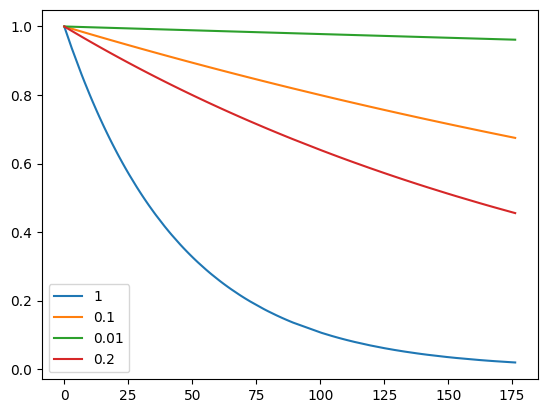

In [9]:
plt.plot(Xof, exp1, label='1')
plt.plot(Xof, exp01, label='0.1')
plt.plot(Xof, exp001, label='0.01')
plt.plot(Xof, exp02, label='0.2')
plt.legend()

In [12]:
Xoo = np.random.choice(Xo.flatten(), 100)
Xoo = np.sort(Xoo)
ktg = KernelTransform('gaussian', use_std=True, sigma=2)
Xg2 = ktg.fit_transform(Xoo)
ktg = KernelTransform('gaussian', use_std=True, sigma=4)
Xg4 = ktg.fit_transform(Xoo)
ktg = KernelTransform('gaussian', use_std=True, sigma=8)
Xg8 = ktg.fit_transform(Xoo)
ktg = KernelTransform('gaussian', use_std=True, sigma=16)
Xg16 = ktg.fit_transform(Xoo)
# plt.scatter(Xo.flatten(), Xg.flatten(), s=1)
# plt.set_title('Gaussian Kernel')


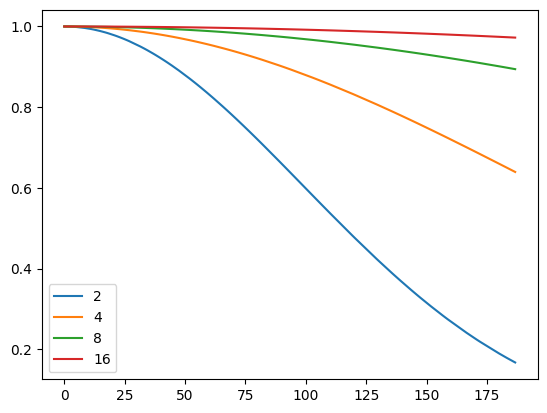

In [13]:
plt.plot(Xoo, Xg2, label='2')
plt.plot(Xoo, Xg4, label='4')
plt.plot(Xoo, Xg8, label='8')
plt.plot(Xoo, Xg16, label='16')
plt.legend()